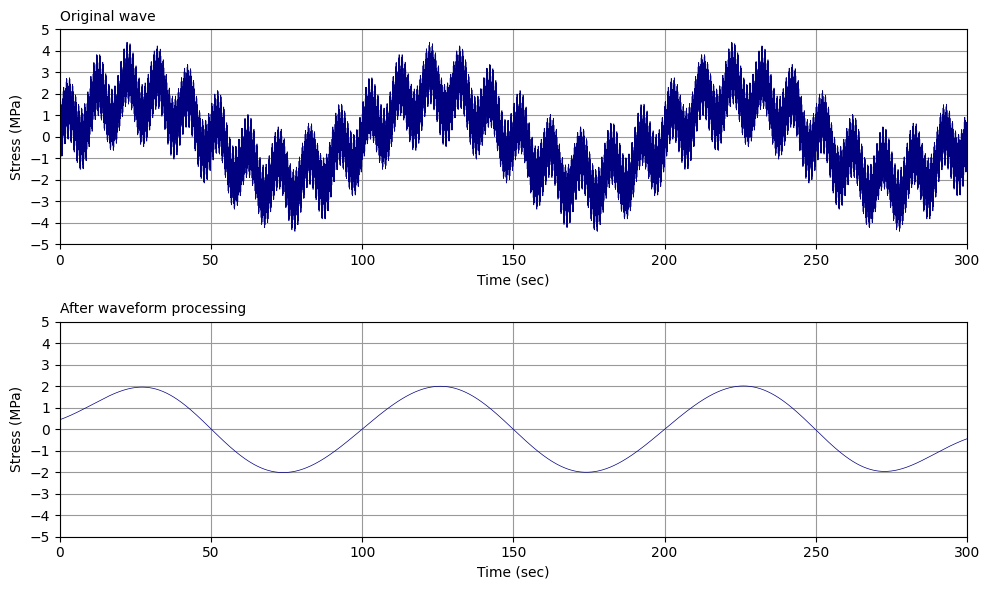

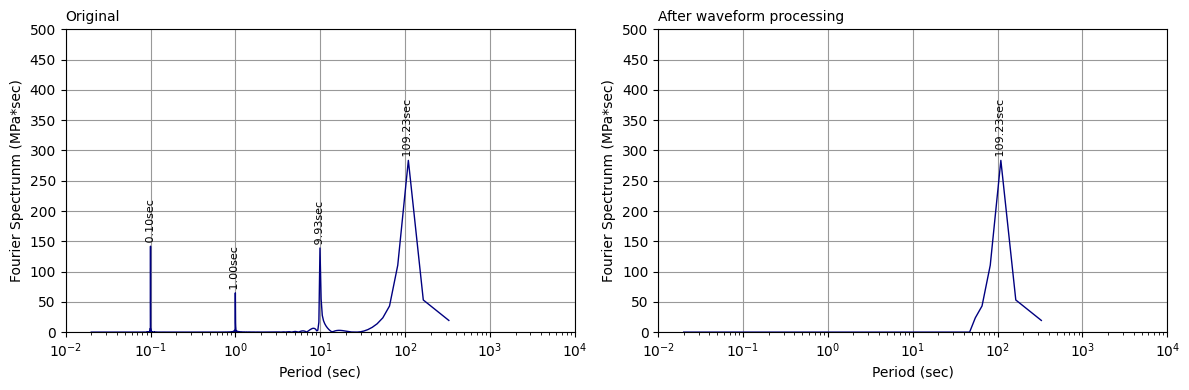

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


def drawfig1(tt,xx1,xx2):
    fsz=10
    xmin=0 ; xmax=300; dx=50
    ymin=-5; ymax=5; dy=1
    iw=10
    ih=3
    plt.figure(figsize=(iw,ih*2),facecolor='w')
    plt.rcParams['font.size']=fsz
    plt.rcParams['font.family']='sans-serif'
    for iii in [1,2]:
        if iii==1:
            tstr='Original wave'
            x=tt
            y=xx1[0:len(tt)]
        if iii==2:
            tstr='After waveform processing'
            x=tt
            y=xx2[0:len(tt)]
        nplt=210+iii
        plt.subplot(nplt)
        plt.xlim([xmin,xmax])
        plt.ylim([ymin,ymax])
        plt.xlabel('Time (sec)')
        plt.ylabel('Stress (MPa)')
        plt.xticks(np.arange(xmin,xmax+dx,dx))
        plt.yticks(np.arange(ymin,ymax+dy,dy))
        plt.grid(color='#999999',linestyle='solid')
        plt.title(tstr,loc='left',fontsize=fsz)
        plt.plot(x,y,'-',color='#000080',lw=0.5)
    plt.tight_layout()
    fnameF='fig_wave1.jpg'
    plt.savefig(fnameF, dpi=200, bbox_inches="tight", pad_inches=0.1)
    

def drawfig2(fk1,spa1,fk2,spa2):
    fsz=10
    xmin=0.01; xmax=10000; dx=1
    ymin=0; ymax=500; dy=50
    iw=6
    ih=4
    plt.figure(figsize=(iw*2,ih),facecolor='w')
    plt.rcParams['font.size']=fsz
    plt.rcParams['font.family']='sans-serif'
    for iii in [1,2]:
        if iii==1:
            tstr='Original'
            x=1/fk1[1:]; y=spa1[1:len(x)+1]
        if iii==2:
            tstr='After waveform processing'
            x=1/fk2[1:]; y=spa2[1:len(x)+1]
        nplt=120+iii
        plt.subplot(nplt)
        plt.xlim([xmin,xmax])
        plt.ylim([ymin,ymax])
        plt.xlabel('Period (sec)',fontsize=fsz)
        plt.ylabel('Fourier Spectrunm (MPa*sec)',fontsize=fsz)
        plt.xticks(np.arange(xmin,xmax+dx,dx))
        plt.yticks(np.arange(ymin,ymax+dy,dy))
        plt.grid(color='#999999',linestyle='solid')
        plt.title(tstr,loc='left',fontsize=fsz)
        plt.xscale('log')
        plt.plot(x,y,color='#000080',lw=1)
        id=find_peaks(y,height=50)[0]
        for i in id:
            ss=' {0:.2f}sec'.format(x[i])
            plt.text(x[i],y[i],ss,ha='center',va='bottom',fontsize=fsz-2,rotation=90)

    plt.tight_layout()
    fnameF='fig_wave2.jpg'
    plt.savefig(fnameF, dpi=200, bbox_inches="tight", pad_inches=0.1)


def nfft_n(x):
    nd=len(x)
    nn=2
    while nn<nd:
        nn=nn*2
    xx=np.zeros(nn)
    xx[0:nd]=xx[0:nd]+x[0:nd]
    sp=np.fft.fft(xx)/nn # complex number
    return nn,sp


def ifft_n(nn,sp):
    wv=np.fft.ifft(sp*nn) # complex number
    return wv.real


def main():
    # preparation of test wave
    dt=0.01
    tt=np.arange(0,300+dt,dt)
    x1=1.0*np.sin(2*np.pi*tt/0.1)
    x2=0.5*np.sin(2*np.pi*tt/1.0)
    x3=1.0*np.sin(2*np.pi*tt/10.0)
    x4=2.0*np.sin(2*np.pi*tt/100.0)
    x=x1+x2+x3+x4
 
    xx1=x
    nn,sp1=nfft_n(xx1)
    spa1=np.sqrt(sp1.real[0:int(nn/2)+1]**2+sp1.imag[0:int(nn/2)+1]**2)*dt*nn
    fk1=np.arange(0,nn/2+1)/nn/dt

    sp=sp1
    for i in range(0,len(fk1)):
        if 0.02<=fk1[i]:
            sp.real[i]=0; sp.real[nn-i]=0
            sp.imag[i]=0; sp.imag[nn-i]=0
    xx2=ifft_n(nn,sp)
    nn,sp2=nfft_n(xx2)
    spa2=np.sqrt(sp2.real[0:int(nn/2)+1]**2+sp2.imag[0:int(nn/2)+1]**2)*dt*nn
    fk2=np.arange(0,nn/2+1)/nn/dt
    
    drawfig1(tt,xx1,xx2) # time history
    drawfig2(fk1,spa1,fk2,spa2) # Fourier spectrum


#---------------
# Execute
#---------------
if __name__ == '__main__': main()